## Ejemplo K-Means

In [1]:
import seaborn as sns

# Importamos el Dataset Iris
df = sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


> Supongamos que utilizaremos sólo las variables numéricas... "Species", es de hecho la respuesta correcta (la etiqueta). 

In [2]:
# Definimos X como una Matriz sin la variable Species.
X = df.drop(columns="species")
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Ayuda Visual
Vamos a utilizar PCA para poder reducir las dimensiones a un tamaño el cual podamos visualizar: 2D.

In [3]:
from sklearn.decomposition import PCA

## Esto es sólo una ayuda para poder visualizar datos
# que están en más dimensiones de las que podemos ver.
pca = PCA(n_components=2, random_state=1)
pca_X = pca.fit_transform(X)
pca_X

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

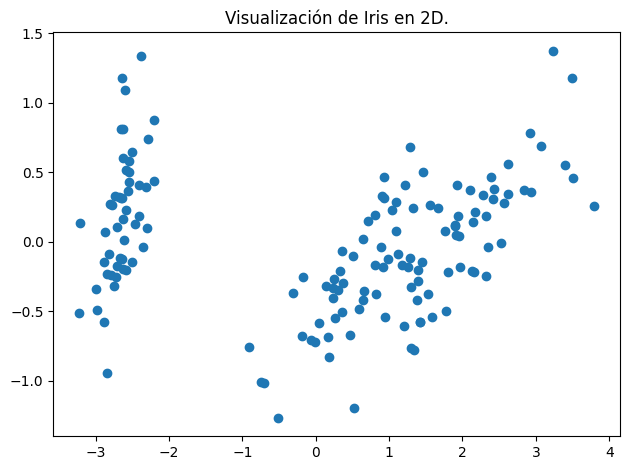

In [4]:
import matplotlib.pyplot as plt

plt.scatter(pca_X[:, 0], pca_X[:, 1])
plt.title("Visualización de Iris en 2D.")
plt.tight_layout()

In [5]:
## Esta es una función que nos permitirá visualizar nuestras etiquetas en un espacio reducido por PCA.
## Además permite la visualización de los centroides de nuestro proceso...


def pca_viz(pca_X, pca_centroids, labels, title=None, cmap="viridis"):
    plt.scatter(pca_X[:, 0], pca_X[:, 1], c=labels, cmap=cmap)
    plt.scatter(
        pca_centroids[:, 0],
        pca_centroids[:, 1],
        marker="*",
        c="red",
        s=150,
    )
    plt.title(title)

### Implementación de K-Means

/home/datacuber/miniconda3/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


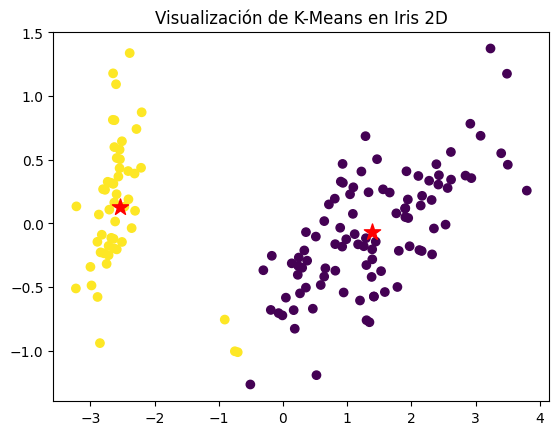

In [6]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, n_init=10, random_state=1)
labels = km.fit_predict(X)
centroids = km.cluster_centers_
pca_centroids = pca.transform(centroids)

pca_viz(
    pca_X,
    pca_centroids,
    labels=labels,
    title="Visualización de K-Means en Iris 2D",
)

### Efecto del Escalamiento en K-Means

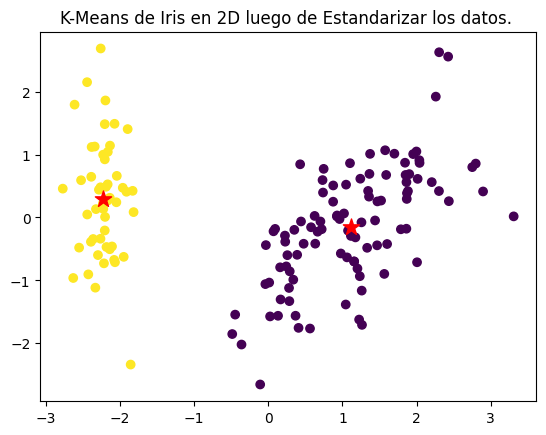

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
pca = PCA(n_components=2, random_state=1)
pca_X_sc = pca.fit_transform(X_sc)
km = KMeans(n_clusters=2, n_init=10, random_state=1)
sc_labels = km.fit_predict(X_sc)
centroids = km.cluster_centers_
pca_centroids = pca.transform(centroids)
pca_viz(
    pca_X_sc,
    pca_centroids,
    sc_labels,
    title="K-Means de Iris en 2D luego de Estandarizar los datos. ",
)

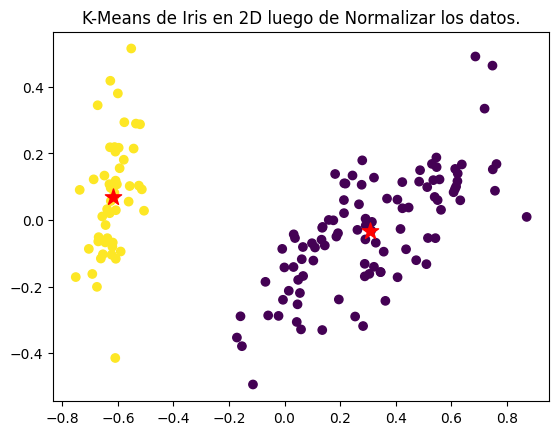

In [8]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
X_mm = mm.fit_transform(X)
pca = PCA(n_components=2, random_state=1)
pca_X_mm = pca.fit_transform(X_mm)
km = KMeans(n_clusters=2, n_init=10, random_state=1)
mm_labels = km.fit_predict(X_mm)
centroids = km.cluster_centers_
pca_centroids = pca.transform(centroids)

pca_viz(
    pca_X_mm,
    pca_centroids,
    mm_labels,
    title="K-Means de Iris en 2D luego de Normalizar los datos.",
)

## Ejemplo más avanzado sin entrenar con todos los datos...

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.25, random_state=1)

> Estamos dejando un 25% de los datos fuera para poder chequear cuál sería la `predicción` que se le dan a dichos datos.

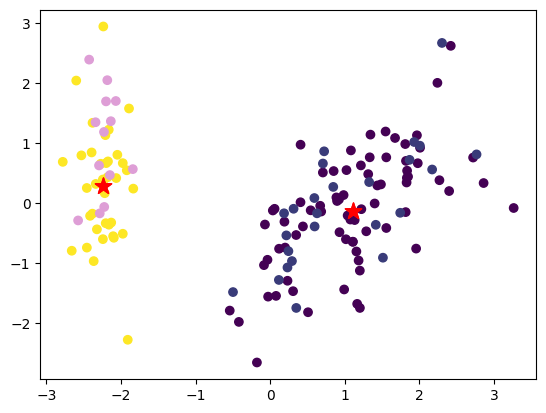

In [10]:
pca = PCA(n_components=2)
km = KMeans(n_clusters=2, n_init=10)
sc = StandardScaler()
## Fit siempre se hace con datos de `Entrenamiento`.

## Escalamos los datos...
sc.fit(X_train)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

# Generamos las coordenadas del PCA para visualizar
pca.fit(X_train_sc)
pca_train = pca.transform(X_train_sc)
pca_test = pca.transform(X_test_sc)

train_labels = km.fit_predict(X_train_sc)
test_labels = km.predict(X_test_sc)
centroids = km.cluster_centers_
pca_centroids = pca.transform(centroids)

pca_viz(pca_train, pca_centroids, train_labels)
pca_viz(pca_test, pca_centroids, test_labels, cmap="tab20b")

## Cuál es el K óptimo?

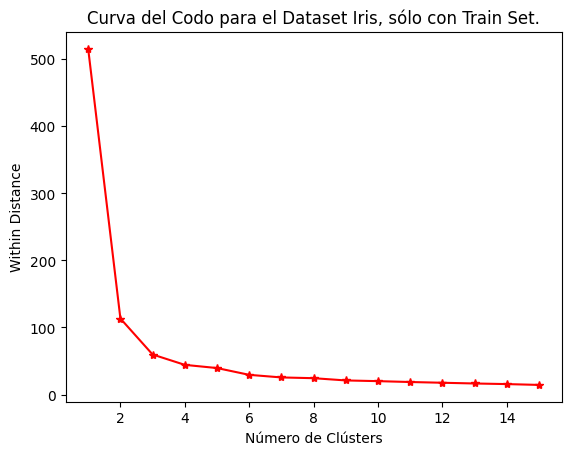

In [11]:
def elbow_curve(X, k_max=10, color="blue", title=None):
    wc = []
    for k in range(1, k_max + 1):
        km = KMeans(n_clusters=k, random_state=1)
        km.fit(X)
        wc.append(km.inertia_)

    k = [*range(1, k_max + 1)]
    plt.plot(k, wc, c=color, marker="*")
    plt.title(title)
    plt.xlabel("Número de Clústers")
    plt.ylabel("Within Distance")
    return wc


wc = elbow_curve(
    X_train,
    k_max=15,
    color="red",
    title="Curva del Codo para el Dataset Iris, sólo con Train Set.",
)

In [12]:
wc

[515.3663392857143,
 113.34311204776957,
 59.683330330330335,
 44.23577915630494,
 39.480498429149215,
 29.34430917366947,
 25.489677197802195,
 24.360444902319905,
 21.00703250915751,
 19.953876221001224,
 18.650211996336996,
 17.556307234432236,
 16.4660901475975,
 15.561554433311787,
 14.325110805860806]